## EJERCICIO 

ejercicio para ver como funciona lo del validation test. Vas a usar un training set dividido en dos, training set y validation test; y un test set para ver si de verdad el modelo es bueno. se va a usar la base de datos de la vivienda en california.

In [4]:
#@title Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [8]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


In [9]:
#ahora escalas los valores para que no sean una locura

train_df['median_house_value'] = train_df['median_house_value']/1000
test_df['median_house_value'] = test_df['median_house_value']/1000

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [23]:
#funciones para crear el modelo de regresion y para entrenarlo

def build_model(learning_rate):
    """creas el modelo base que se usara"""
    
    model = tf.keras.models.Sequential() #creas el modelo
    
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,))) #le das forma diciendole que tiene una unica capa con un nodo
    
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=learning_rate),
                 loss = "mean_squared_error",
                 metrics = [tf.keras.metrics.RootMeanSquaredError()])
    return model
         
    
def train_model(model, df, feature, label, my_epochs, my_batch_size= None, my_validation_split = 0.1):
    """feed a dataset to the model in order to train it"""
    
    history = model.fit(x=df[feature],
                       y=df[label],
                       batch_size=my_batch_size,
                       epochs=my_epochs,
                       validation_split=my_validation_split)
    
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    
    return epochs, rmse, history.history
    

In [12]:
# ahora diseña las fincuones para ver el modelo en una grafica y las pruebas, para apreciar bien el loss
# y saber si cambiar algo o no.

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  


# # Task 1

In the following code cell, you'll see a variable named validation_split, which we've initialized at 0.2. The validation_split variable specifies the proportion of the original training set that will serve as the validation set. The original training set contains 17,000 examples. Therefore, a validation_split of 0.2 means that:

17,000 * 0.2 ~= 3,400 examples will become the validation set.

17,000 * 0.8 ~= 13,600 examples will become the new training set.

The following code builds a model, trains it on the training set, and evaluates the built model on both:

The training set.
And the validation set.
If the data in the training set is similar to the data in the validation set, then the two loss curves and the final loss values should be almost identical. However, the loss curves and final loss values are not almost identical. Hmm, that's odd.

Experiment with two or three different values of validation_split. Do different values of validation_split fix the problem?

Epoch 1/40
102/102 [==============================] - 1s 3ms/step - loss: 45801.9453 - root_mean_squared_error: 214.0139 - val_loss: 35042.2109 - val_root_mean_squared_error: 187.1956
Epoch 2/40
102/102 [==============================] - 0s 2ms/step - loss: 28057.9961 - root_mean_squared_error: 167.5052 - val_loss: 20444.3594 - val_root_mean_squared_error: 142.9838
Epoch 3/40
102/102 [==============================] - 0s 2ms/step - loss: 15935.4570 - root_mean_squared_error: 126.2357 - val_loss: 11259.6357 - val_root_mean_squared_error: 106.1114
Epoch 4/40
102/102 [==============================] - 0s 2ms/step - loss: 9221.8838 - root_mean_squared_error: 96.0306 - val_loss: 7196.1973 - val_root_mean_squared_error: 84.8304
Epoch 5/40
102/102 [==============================] - 0s 3ms/step - loss: 7220.4399 - root_mean_squared_error: 84.9732 - val_loss: 6800.8306 - val_root_mean_squared_error: 82.4671
Epoch 6/40
102/102 [==============================] - 0s 3ms/step - loss: 7152.6763 - ro

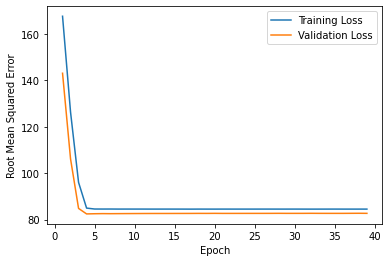

In [26]:
learning_rate = 0.1
epochs = 40
batch_size = 100

validation_split = 0.4 #original 0.2

my_feature = "median_income"
my_label = "median_house_value"

my_model = None #una manera de limpiar el model, por si habia otro anterior guardado

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                   history["val_root_mean_squared_error"])

el error sigue siendo diferente entre el training set y el validation set a pesar de variar el validation_split. Entonces el unico error (o un error altamente probable) es que el fallo este en los datos asique nunca esta de mas comprobarlos.
Podemos comprobarlo de la siguiente manera:

In [27]:
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


el error que se ve es que los datos estan ordenados por "longitude". Entonces el error nace de que a la hora de dividir los dos datasets se quedan:
 train_df = train_df - validation_df
 validation_df = validation_df
 
las longitudes de train df van a ser menores que las de validation siempre entonces no estan cogidos "aleatoriamente" por asi decirlo los valores. Y esto ademas de que solo por la longitude sino porque esta, afecta a el resto de features entonces claro si la relacion es, por ejemplo, longitude * feature, pues las de validation van a ser siempre mayores, haciendo que el modelo no sea valido, porque se ha entrenado para valores siempre mas pequeños.
Conclusion: los valores del train y del validation tienen que ser distintos pero iguales. No puedees entrenar un modelo para peras y meterle manzanas, aunq se parezcan, nunca va a ser igual.

Por suerte esto tiene facil solucion. shuffleando los valores del training set before splitting it y usando ese en el train_model()

In [32]:
train_df = train_df.reindex(np.random.permutation(train_df.index))

Epoch 1/40
145/145 [==============================] - 1s 3ms/step - loss: 41799.3711 - root_mean_squared_error: 204.4489 - val_loss: 28748.0273 - val_root_mean_squared_error: 169.5524
Epoch 2/40
145/145 [==============================] - 0s 2ms/step - loss: 20009.4961 - root_mean_squared_error: 141.4549 - val_loss: 12556.4463 - val_root_mean_squared_error: 112.0555
Epoch 3/40
145/145 [==============================] - 0s 2ms/step - loss: 9136.9219 - root_mean_squared_error: 95.5872 - val_loss: 7127.7959 - val_root_mean_squared_error: 84.4263
Epoch 4/40
145/145 [==============================] - 0s 2ms/step - loss: 7023.9600 - root_mean_squared_error: 83.8091 - val_loss: 7058.1992 - val_root_mean_squared_error: 84.0131
Epoch 5/40
145/145 [==============================] - 0s 2ms/step - loss: 7008.9175 - root_mean_squared_error: 83.7193 - val_loss: 7054.1821 - val_root_mean_squared_error: 83.9892
Epoch 6/40
145/145 [==============================] - 0s 2ms/step - loss: 7009.3066 - root_m

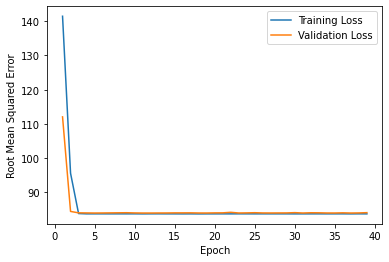

In [33]:
#bolbemos a llamar a los metodos pero con el train_df mezclado
learning_rate = 0.1
epochs = 40
batch_size = 100

validation_split = 0.15 #original 0.2

my_feature = "median_income"
my_label = "median_house_value"

my_model = None #una manera de limpiar el model, por si habia otro anterior guardado

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                   history["val_root_mean_squared_error"])

ahora podemos apreciar perfectamente que si funciona y que el error en el training set es el mismo o muy similar al del validation set.
como se puede ver:

 el error del train es  root_mean_squared_error = 83.7261
 el error del validation es val_root_mean_squared_error =  83.9903
ahora solo queda probar el test set.

In [34]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 2ms/step - loss: 7013.7100 - root_mean_squared_error: 83.7479


como vemos que el rmse es el mismo casi al 99% se puede afirmar que el modelo funciona